## Metapredict per-residue performance
This notebook, when run, offers a means to check the per-residue performance of metapredict on local hardware. This notebook was also used to generate **Supporting Figure S5** in the metapredict manuscript.

In [9]:
import matplotlib
import random
import time
import numpy as np

# import metapredict!
from metapredict import meta

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

In [10]:
# Updated in Feb 2022 - if set to true means original figures from publication are reproduced. 
# If set to false means we use the updated (V2) version of metapredict
#
LEGACY=False

In [11]:
amino_acids = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']
def genseq(n):
    """
    Function that generates a random sequence.
    
    Parameters
    -------------
    n : int
        Number of residues in sequence to generate.
        
    Returns
    --------
    str
        Returns a valid amino acid sequence
    """
    return "".join([random.choice(amino_acids) for i in range(n)])



In [12]:
all_times = []
all_errors = []
res_per_sec = []
res_per_sec_error = []

# range of sequence lengths to check
all_lengths = [5,10,20,50,100,200,300,400,500,600,700,800,900,1000,1500,2000,2500,3000,3500,4000,4500,5000]


# number of independent sequences to generate
count=30

for l in all_lengths:
    
    print('On %i'%(l))
    local = []
    
    for i in range(count):
        s = genseq(l)
        start = time.time()
        meta.predict_disorder(s, legacy=LEGACY)
        end = time.time()
        local.append((end-start))
        
        
    res_per_sec.append(l/np.mean(local))
    res_per_sec_error.append(np.std(l/np.array(local))/np.sqrt(count))
    
    all_times.append(np.mean(local))
    all_errors.append(np.std(local)/np.sqrt(count))

On 5
On 10
On 20
On 50
On 100
On 200
On 300
On 400
On 500
On 600
On 700
On 800
On 900
On 1000
On 1500
On 2000
On 2500
On 3000
On 3500
On 4000
On 4500
On 5000


meta NOT subset; don't know how to subset; dropped


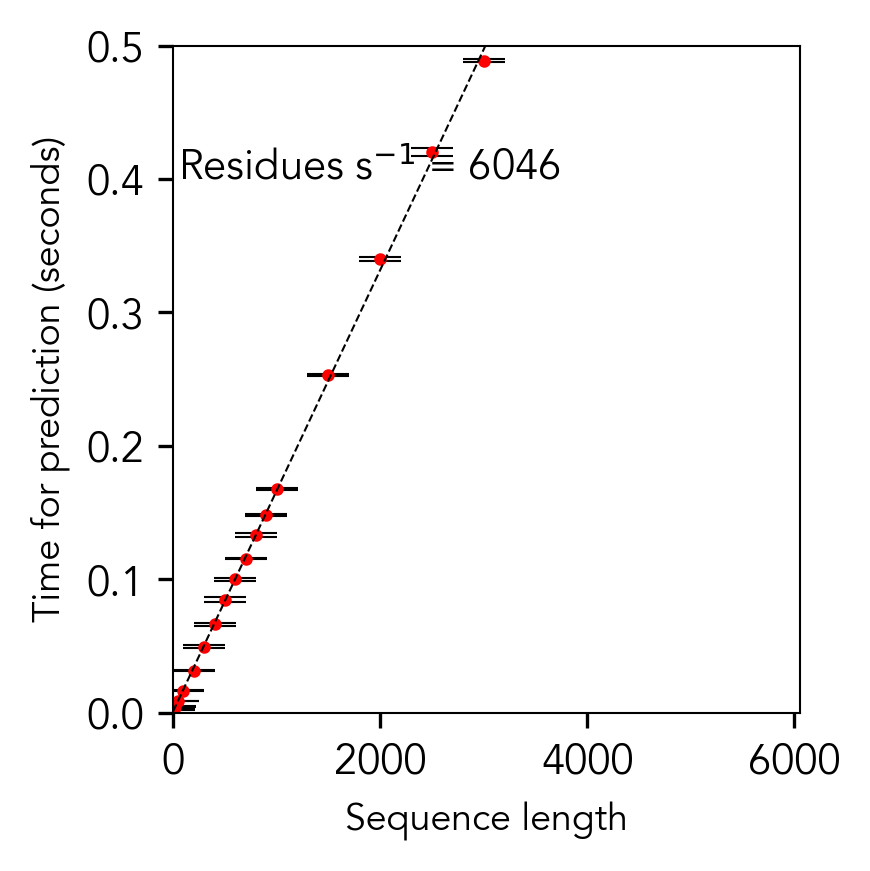

In [13]:
figure(num=None, figsize=(3, 3), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()


plt.errorbar(all_lengths, all_times, yerr=all_errors,color='k', linewidth=0.4, linestyle=' ', capsize=5, capthick=0.5)
plt.plot(all_lengths, all_times, 'o',color='r',ms=2)
pf = np.polyfit(all_lengths, all_times,1)

local_x = np.array([0,8000])
plt.plot(local_x, local_x*pf[0] + pf[1],'--k' ,linewidth=0.5)
plt.text(50,0.4, 'Residues s$^{-1}$ = %i'%(1/pf[0]))

plt.ylim([0, 0.5])
plt.xlim([0, 6050])
plt.ylabel('Time for prediction (seconds)',fontsize=9)
plt.xlabel('Sequence length',fontsize=9)

plt.tight_layout()
if LEGACY is False:
    plt.savefig('time_vs_seqlen_v2.pdf')
else:
    plt.savefig('time_vs_seqlen.pdf')


meta NOT subset; don't know how to subset; dropped


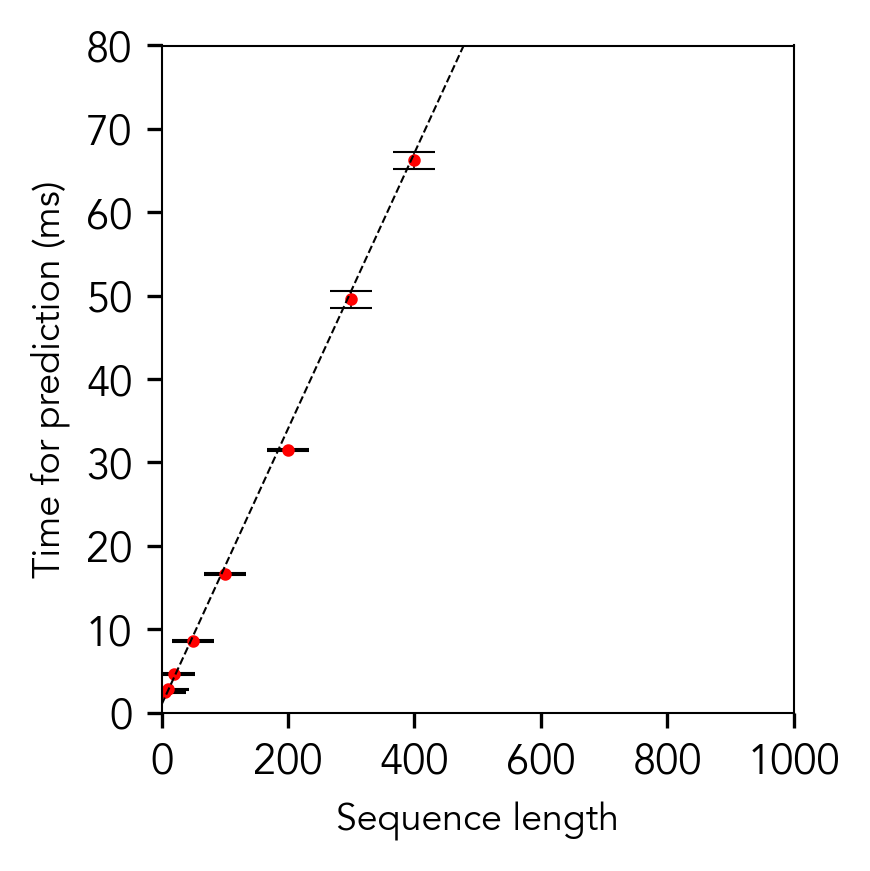

In [16]:
figure(num=None, figsize=(3, 3), dpi=150, facecolor='w', edgecolor='k')
ax = plt.gca()


#1000 for sec->ms
plt.errorbar(all_lengths, 1000*np.array(all_times), yerr=1000*np.array(all_errors),color='k', linewidth=0.4, linestyle=' ', capsize=5, capthick=0.5)
plt.plot(all_lengths, 1000*np.array(all_times), 'o',color='r',ms=2)
pf = np.polyfit(all_lengths, all_times,1)

local_x = np.array([0,1000])
plt.plot(local_x, 1000*(local_x*pf[0] + pf[1]),'--k' ,linewidth=0.5)


plt.ylim([0, 80])
plt.xlim([0, 1000])
plt.ylabel('Time for prediction (ms)', fontsize=9)
plt.xlabel('Sequence length',fontsize=9)

plt.tight_layout()

if LEGACY==False:
    plt.savefig('ZOOM_time_vs_seqlen_LEGACY.pdf')
else:
    plt.savefig('ZOOM_time_vs_seqlen.pdf')
